## Logistic Regression using upsampled classess.

In [1]:
#Preprocessing 

from sklearn.utils import resample
import itertools
from sklearn import preprocessing
import re
from sklearn import feature_selection as f_select
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
sns.set_style("darkgrid")
import sklearn.linear_model
import os
import math
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from __future__ import print_function, division
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
df = pd.read_pickle('df.pickle')

In [12]:
## assign features to X
X = df[['accountspayable',
       'accountsreceivable', 'addlincomeexpenseitems', 'aftertaxroe',
       'capitalexpenditures', 'capitalsurplus', 'cashratio',
       'cashandcashequivalents', 'changesininventories', 'commonstocks',
       'costofrevenue', 'currentratio', 'deferredassetcharges',
       'deferredliabilitycharges', 'depreciation',
       'earningsbeforeinterestandtax', 'earningsbeforetax',
       'effectofexchangerate', 'equityearningslossunconsolidatedsubsidiary',
       'fixedassets', 'goodwill', 'grossmargin', 'grossprofit', 'incometax',
       'intangibleassets', 'interestexpense', 'inventory', 'investments',
       'liabilities', 'longtermdebt', 'longterminvestments',
       'minorityinterest', 'miscstocks', 'netborrowings', 'netcashflow',
       'netcashflowoperating', 'netcashflowsfinancing',
       'netcashflowsinvesting', 'netincome', 'netincomeadjustments',
       'netincomeapplicabletocommonshareholders', 'netincomecontoperations',
       'netreceivables', 'nonrecurringitems', 'operatingincome',
       'operatingmargin', 'otherassets', 'othercurrentassets',
       'othercurrentliabilities', 'otherequity', 'otherfinancingactivities',
       'otherinvestingactivities', 'otherliabilities',
       'otheroperatingactivities', 'otheroperatingitems', 'pretaxmargin',
       'pretaxroe', 'profitmargin', 'quickratio', 'researchanddevelopment',
       'retainedearnings', 'saleandpurchaseofstock', 'salesgeneralandadmin',
       'shorttermdebtcurrentportionoflongtermdebt', 'shortterminvestments',
       'totalassets', 'totalcurrentassets', 'totalcurrentliabilities',
       'totalequity', 'totalliabilities', 'totalliabilitiesequity',
       'totalrevenue', 'treasurystock',  'earningspershare',
       'estimatedsharesoutstanding', 'volume',
       'housing_prices', '30year_mort', 'dis_cost',
       ]]



In [4]:
# new_x = ['accountspayable',
#        'accountsreceivable', 'addlincomeexpenseitems', 'aftertaxroe',
#        'capitalexpenditures', 'capitalsurplus', 'cashratio',
#        'cashandcashequivalents', 'changesininventories', 'commonstocks',
#        'costofrevenue', 'currentratio', 'deferredassetcharges',
#        'deferredliabilitycharges', 'depreciation',
#        'earningsbeforeinterestandtax', 'earningsbeforetax',
#        'effectofexchangerate', 'equityearningslossunconsolidatedsubsidiary',
#        'fixedassets', 'goodwill', 'grossmargin', 'grossprofit', 'incometax',
#        'intangibleassets', 'interestexpense', 'inventory', 'investments',
#        'liabilities', 'longtermdebt', 'longterminvestments',
#        'minorityinterest', 'miscstocks', 'netborrowings', 'netcashflow',
#        'netcashflowoperating', 'netcashflowsfinancing',
#        'netcashflowsinvesting', 'netincome', 'netincomeadjustments',
#        'netincomeapplicabletocommonshareholders', 'netincomecontoperations',
#        'netreceivables', 'nonrecurringitems', 'operatingincome',
#        'operatingmargin', 'otherassets', 'othercurrentassets',
#        'othercurrentliabilities', 'otherequity', 'otherfinancingactivities',
#        'otherinvestingactivities', 'otherliabilities',
#        'otheroperatingactivities', 'otheroperatingitems', 'pretaxmargin',
#        'pretaxroe', 'profitmargin', 'quickratio', 'researchanddevelopment',
#        'retainedearnings', 'saleandpurchaseofstock', 'salesgeneralandadmin',
#        'shorttermdebtcurrentportionoflongtermdebt', 'shortterminvestments',
#        'totalassets', 'totalcurrentassets', 'totalcurrentliabilities',
#        'totalequity', 'totalliabilities', 'totalliabilitiesequity',
#        'totalrevenue', 'treasurystock',  'earningspershare',
#        'estimatedsharesoutstanding', 'volume',
#        'housing_prices', '30year_mort', 'dis_cost',
#        ]

In [13]:
## Assign class variables to y
y = df.sp_class

### Logistic Regression


In [14]:
##UPSAMPLE AND SPLIT INTO TRAINING AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#join back y train to X train for full train set
train = X_train.join(y_train)

#separate train set to the two classes
outperf = train[train.sp_class == 1] 
underperf = train[train.sp_class == 0]

from sklearn.utils import resample

#upsample to 473 
outperf_up = resample(outperf, n_samples = 473, replace=True)


#add the resampled classes back together
resampled_train = pd.concat([outperf_up, underperf])

#split the resampled train into X and y
X_up= resampled_train.drop(['sp_class'], axis = 1)
y_up = resampled_train.sp_class




In [15]:
##FIT LOGISTIC REGRESSION MODEL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_up, y_up)
y_pred =logreg.predict(X_test)

In [16]:
##RESULTS

print (X_up.shape, y_up.shape)
print (X_test.shape, y_test.shape)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

(946, 79) (946,)
(307, 79) (307,)
Accuracy of logistic regression classifier on test set: 0.64


In [17]:
##K-FOLD AND CROSS-VALIDATION
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight='balanced')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_up,
                                          y_up, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))



10-fold cross validation average accuracy: 0.640


In [18]:

from sklearn.metrics import confusion_matrix
logreg_con_mat = confusion_matrix(y_test, y_pred)
print ("Logistic Regression Confusion Matrix")
print(logreg_con_mat)


Logistic Regression Confusion Matrix
[[131  73]
 [ 38  65]]


In [19]:


from sklearn.metrics import classification_report
print ("Logistic Regression Class Report")
print(classification_report(y_test, y_pred))


Logistic Regression Class Report
             precision    recall  f1-score   support

          0       0.78      0.64      0.70       204
          1       0.47      0.63      0.54       103

avg / total       0.67      0.64      0.65       307



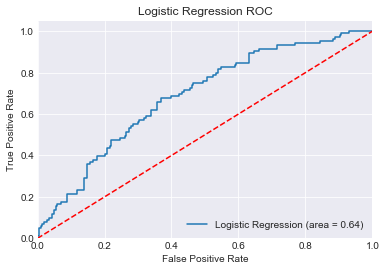

In [20]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### RANDOM FOREST 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(max_depth= 10, min_samples_leaf=40, n_estimators= 10)
    
rf_model.fit(X_up, y_up)

predicted = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.668


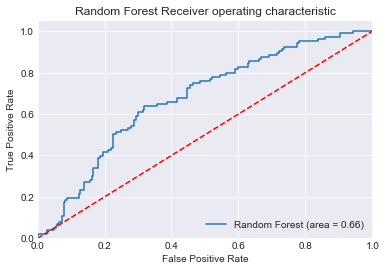

In [23]:
##Random forest 
rand_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rand_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest_ROC')
plt.show()

In [24]:

logreg_con_mat = confusion_matrix(y_test, predicted)
print ("Random Forest Regression Confusion Matrix")
print(logreg_con_mat)

print ("Random Forest Classification Report")
print(classification_report(y_test, predicted))

Random Forest Regression Confusion Matrix
[[139  65]
 [ 37  66]]
Random Forest Classification Report
             precision    recall  f1-score   support

          0       0.79      0.68      0.73       204
          1       0.50      0.64      0.56       103

avg / total       0.69      0.67      0.68       307



### RANDOM FOREST AFTER GRID SEARCH 

In [26]:
##AFTER GRID SEARCH {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 80}
rf_model = RandomForestClassifier(max_depth= 25, min_samples_split=2, n_estimators= 80)
    
rf_model.fit(X_up, y_up)

predicted = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.678


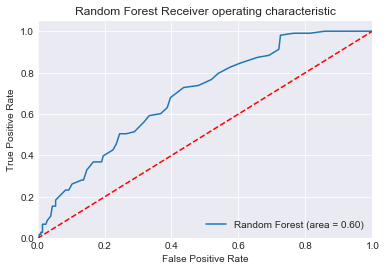

In [27]:
##Random forest 
rand_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rand_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest_ROC')
plt.show()

In [28]:

logreg_con_mat = confusion_matrix(y_test, predicted)
print ("Random Forest Regression Confusion Matrix")
print(logreg_con_mat)

print ("Random Forest Class Report")
print(classification_report(y_test, predicted))

Random Forest Regression Confusion Matrix
[[170  34]
 [ 65  38]]
Random Forest Class Report
             precision    recall  f1-score   support

          0       0.72      0.83      0.77       204
          1       0.53      0.37      0.43       103

avg / total       0.66      0.68      0.66       307



In [29]:

features = X.columns
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Features,Importance Score
77,30year_mort,0.035277
2,addlincomeexpenseitems,0.028196
1,accountsreceivable,0.023105
60,retainedearnings,0.021462
78,dis_cost,0.020871


In [30]:
from sklearn.grid_search import GridSearchCV

rf_model= RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split =2) 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [5, 10, 20, 50 , 80],
           "max_depth" : [1, 5, 10, 15, 25],
           "min_samples_split" : [2, 10, 20, 40, 80]}

CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_up, y_up)
print (CV_rfc.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 80}


In [31]:


train.sp_class.value_counts()


0    473
1    242
Name: sp_class, dtype: int64

In [32]:
resampled_train.sp_class.value_counts()

1    473
0    473
Name: sp_class, dtype: int64

### IMPLEMENTATION OF POTENTIAL PROFIT STRATEGY


In [174]:
dfq = df[df.year!=2015]
print (len(df))
len(dfq)

1022


844

In [175]:
dfq

,unnamed,ticker,periodending,accountspayable,accountsreceivable,addlincomeexpenseitems,aftertaxroe,capitalexpenditures,capitalsurplus,cashratio,...,housing_prices,30year_mort,sp_return,index,dis_cost,co_return,ret_vs_sp,log_co_return,return_class,sp_class
0,0,AAL,2012-12-31,0.049440,0.650993,0.139602,0.003973,0.950296,0.058984,0.050913,...,0.000000,0.0,0.1589,32,1.000000,0.841523,0.682623,-0.172542,1,1
1,1,AAL,2013-12-31,0.080909,0.664472,0.098938,0.011574,0.918020,0.123201,0.072046,...,0.373799,1.0,0.3215,33,0.077132,1.015408,0.693908,0.015290,1,1
2,2,AAL,2014-12-31,0.075843,0.657471,0.236245,0.024702,0.860182,0.172673,0.057637,...,0.541312,0.9,0.1352,34,0.000000,0.039717,-0.095483,-3.225988,2,0
4,4,AAP,2012-12-29,0.038573,0.664840,0.244282,0.005528,0.992861,0.013522,0.022094,...,0.000000,0.0,0.1589,32,1.000000,0.198224,0.039324,-1.618355,1,1
5,5,AAP,2013-12-28,0.041869,0.670802,0.244394,0.004491,0.994846,0.013643,0.038425,...,0.373799,1.0,0.3215,33,0.077132,0.810445,0.488945,-0.210172,1,1
8,8,AAPL,2013-09-28,0.596561,0.470533,0.305939,0.005182,0.785047,0.007857,0.089337,...,0.373799,1.0,0.3215,33,0.077132,0.461173,0.139673,-0.773982,1,1
9,9,AAPL,2014-09-27,0.801614,0.000000,0.296547,0.006046,0.748032,0.007857,0.038425,...,0.541312,0.9,0.1352,34,0.000000,0.117647,-0.017553,-2.140066,1,0
13,13,ABBV,2013-12-31,0.105216,0.745350,0.241368,0.015892,0.987074,0.047833,0.138329,...,0.373799,1.0,0.3215,33,0.077132,0.283321,-0.038179,-1.261175,1,0
14,14,ABBV,2014-12-31,0.113566,0.656217,0.209510,0.017620,0.983888,0.053529,0.071085,...,0.541312,0.9,0.1352,34,0.000000,0.021805,-0.113395,-3.825631,2,0
16,16,ABC,2013-09-30,0.244206,0.432548,0.244248,0.003282,0.994670,0.033568,0.007685,...,0.373799,1.0,0.3215,33,0.077132,0.305685,-0.015815,-1.185201,1,0


In [171]:
df[df.year >= 2015].ticker.nunique()

179

In [167]:

len(df) - df[df.year == 2015].ticker.nunique()

844

1022

In [142]:
rf_model.predict(X_test)[0:3]

array([0, 0, 1])

In [146]:
len(X_test)

307

In [144]:
[v[1] for v in rf_model.predict_proba(X_test)]

[0.4375, 0.41249999999999998, 0.58750000000000002]